In [3]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [5]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

# Filtering Out Missing Data

In [6]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [7]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [8]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data
cleaned

0    1    2
0  1.0  6.5  3.0

In [9]:
data.dropna(how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0

In [10]:
data[4] = NA
data
data.dropna(axis=1, how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [11]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df
df.dropna()
df.dropna(thresh=2)

0         1         2
2  0.092908       NaN  0.769023
3  1.246435       NaN -1.296221
4  0.274992  0.228913  1.352917
5  0.886429 -2.001637 -0.371843
6  1.669025 -0.438570 -0.539741

# Filling In Missing Data

In [17]:
df.fillna(0)   # se usa para cambiar el NA por "0"

0         1         2
0  0.476985  3.248944 -1.021228
1 -0.577087  0.124121  0.302614
2  0.523772  0.000000  1.343810
3 -0.713544  0.000000 -2.370232
4 -1.860761  0.000000  0.000000
5 -1.265934  0.000000  0.000000

In [21]:
df.fillna("X")   # se usa para cambiar el NA por "X"

0         1         2
0  0.476985   3.24894  -1.02123
1 -0.577087  0.124121  0.302614
2  0.523772         X   1.34381
3 -0.713544         X  -2.37023
4 -1.860761         X         X
5 -1.265934         X         X

In [22]:
df.fillna({1: 0.5, 2: 0}) #Para la columna 1 rellene 0.5, para la columna 2 con 0

0         1         2
0  0.476985  3.248944 -1.021228
1 -0.577087  0.124121  0.302614
2  0.523772  0.500000  1.343810
3 -0.713544  0.500000 -2.370232
4 -1.860761  0.500000  0.000000
5 -1.265934  0.500000  0.000000

In [23]:
_ = df.fillna(0, inplace=True) # inplace actualiza
df

0         1         2
0  0.476985  3.248944 -1.021228
1 -0.577087  0.124121  0.302614
2  0.523772  0.000000  1.343810
3 -0.713544  0.000000 -2.370232
4 -1.860761  0.000000  0.000000
5 -1.265934  0.000000  0.000000

In [24]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df
df.fillna(method='ffill')
df.fillna(method='ffill', limit=2)

#ffill toma el valor del de arriba para completar el Nan

#El limt le dice cuantas veces lo ejecute

0         1         2
0  0.332883 -2.359419 -0.199543
1 -1.541996 -0.970736 -1.307030
2  0.286350 -0.970736 -0.753887
3  0.331286 -0.970736  0.069877
4  0.246674       NaN  0.069877
5  1.327195       NaN  0.069877

In [26]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())  #Rellenar con el promedio de los datos

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

# Data Transformation

In [25]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4
6  two   4

In [27]:
data.duplicated()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [28]:
data.drop_duplicates()

0    1.0
1    NaN
2    3.5
4    7.0
dtype: float64

# Practica 1 

In [79]:
data = pd.DataFrame({'Tom': [1000,2000, 1500,NA,NA],'Pepe': [NA,1000, 500, 2000, 500],'Charlie': [500, 1000,NA,500, NA]})
data
data.rename(index={0: '2019-07-01',1:'2019-08-01',2: '2019-09-01',3:'2019-10-01',4:'2019-11-01'})



Tom    Pepe  Charlie
2019-07-01  1000.0     NaN    500.0
2019-08-01  2000.0  1000.0   1000.0
2019-09-01  1500.0   500.0      NaN
2019-10-01     NaN  2000.0    500.0
2019-11-01     NaN   500.0      NaN

Pregunta 1: ¿Cuándo todos pagan?

In [100]:
data.rename(index={0: '2019-07-01',1:'2019-08-01',2: '2019-09-01',3:'2019-10-01',4:'2019-11-01'}).dropna()

Tom    Pepe  Charlie
2019-08-01  2000.0  1000.0   1000.0

Pregunta 2: ¿Cuándo pagan a menos 2 personas?

In [99]:
data.rename(index={0: '2019-07-01',1:'2019-08-01',2: '2019-09-01',3:'2019-10-01',4:'2019-11-01'}).dropna(thresh=2)

Tom    Pepe  Charlie
2019-07-01  1000.0     NaN    500.0
2019-08-01  2000.0  1000.0   1000.0
2019-09-01  1500.0   500.0      NaN
2019-10-01     NaN  2000.0    500.0

Pregunta 3: ¿Cuánto pagaron todos en total y cuantos pagos se realizaron?

In [108]:
data[data.notnull()].count()

Tom        3
Pepe       4
Charlie    3
dtype: int64

In [109]:
data[data.notnull()].sum()

Tom        4500.0
Pepe       4000.0
Charlie    2000.0
dtype: float64

# --------------------------------------------------------------------------------------------------

# Transforming Data Using a Function or Mapping

In [110]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0

In [111]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [113]:
lowercased = data['food'].str.lower()
lowercased
data['animal'] = lowercased.map(meat_to_animal)  #lower coloca todo en minúscula y map agrega la cagoría del diccionario
data

food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon

In [115]:
data['food'].map(lambda x: meat_to_animal[x.lower()]) #Se puede utilizar para invocar funciones

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [120]:
lowercased = data['food'].str.upper()
lowercased

0          BACON
1    PULLED PORK
2          BACON
3       PASTRAMI
4    CORNED BEEF
5          BACON
6       PASTRAMI
7      HONEY HAM
8       NOVA LOX
Name: food, dtype: object

# Replacing Values

Se usa para reemplazar valores no deseados

In [121]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [122]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [123]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [124]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [125]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

# Renaming Axis Indexes

In [129]:
# Para renombrar los indices
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

# Toma los primeros 4 y pone en mayúscula
transform = lambda x: x[:4].upper()

data.index.map(transform)
data.index = data.index.map(transform)
data

one  two  three  four
OHIO    0    1      2     3
COLO    4    5      6     7
NEW     8    9     10    11

In [131]:


data.rename(index=str.title, columns=str.upper)
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})


one  two  peekaboo  four
INDIANA    0    1         2     3
COLO       4    5         6     7
NEW        8    9        10    11

In [132]:

data.rename(index={'OHIO': 'INDIANA'}, inplace=True)  #Si le gsuta el cambio se debe colocar un implace
data

one  two  three  four
INDIANA    0    1      2     3
COLO       4    5      6     7
NEW        8    9     10    11

# Ejercicio 2

Cambiar los nombres del dataframe del ejercicio 1 de la siguiente forma:
    ; Tom= Alfaro Tomas
    ; Pepe= Castro Jose
    ; Charlie= Mora Carlos

In [138]:
Amigos = pd.DataFrame({'Tom': [1000,2000, 1500,NA,NA],'Pepe': [NA,1000, 500, 2000, 500],'Charlie': [500, 1000,NA,500, NA]})
Amigos


Tom    Pepe  Charlie
0  1000.0     NaN    500.0
1  2000.0  1000.0   1000.0
2  1500.0   500.0      NaN
3     NaN  2000.0    500.0
4     NaN   500.0      NaN

In [137]:
Amigos.rename(index={0: '2019-07-01',1:'2019-08-01',2: '2019-09-01',3:'2019-10-01',4:'2019-11-01'},columns={'Tom': 'Alfaro Tomas','Pepe': 'Castro Jose','Charlie': 'Mora Carlos'})

Alfaro Tomas  Castro Jose  Mora Carlos
2019-07-01        1000.0          NaN        500.0
2019-08-01        2000.0       1000.0       1000.0
2019-09-01        1500.0        500.0          NaN
2019-10-01           NaN       2000.0        500.0
2019-11-01           NaN        500.0          NaN

# Capítulo 9: Visualización

In [139]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)


# A Brief matplotlib API Primer

In [140]:
import matplotlib.pyplot as plt
import numpy as np
data = np.arange(10)
data
plt.plot(data)

# Figures and Subplots

In [163]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--') #Plotear una suma acumulada aleatorio

_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [151]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc01b38d30>,
      dtype=object)

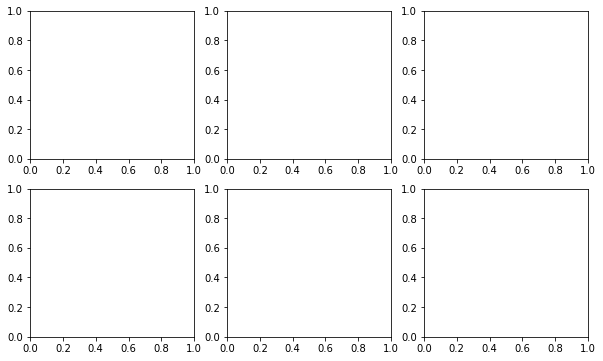

In [152]:
fig, axes = plt.subplots(2, 3)
axes

In [164]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

# Practica 3

Plotear un array del 0 al 1000 en saldos de 10 , a cada x2 para obtener y 

In [196]:
x = np.arange(start=0,stop=1000, step=10)
x
y=x*x
y

array([     0,    100,    400,    900,   1600,   2500,   3600,   4900,
         6400,   8100,  10000,  12100,  14400,  16900,  19600,  22500,
        25600,  28900,  32400,  36100,  40000,  44100,  48400,  52900,
        57600,  62500,  67600,  72900,  78400,  84100,  90000,  96100,
       102400, 108900, 115600, 122500, 129600, 136900, 144400, 152100,
       160000, 168100, 176400, 184900, 193600, 202500, 211600, 220900,
       230400, 240100, 250000, 260100, 270400, 280900, 291600, 302500,
       313600, 324900, 336400, 348100, 360000, 372100, 384400, 396900,
       409600, 422500, 435600, 448900, 462400, 476100, 490000, 504100,
       518400, 532900, 547600, 562500, 577600, 592900, 608400, 624100,
       640000, 656100, 672400, 688900, 705600, 722500, 739600, 756900,
       774400, 792100, 810000, 828100, 846400, 864900, 883600, 902500,
       921600, 940900, 960400, 980100])

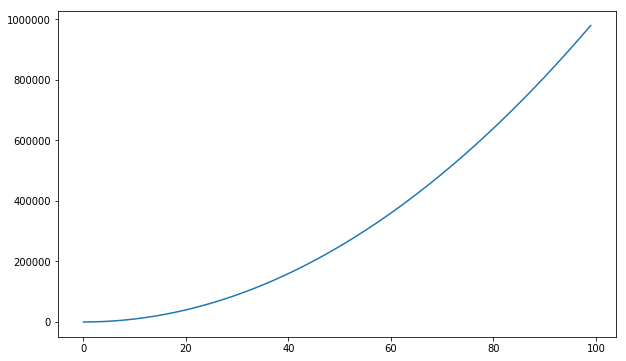

In [197]:
plt.plot(y)

In [198]:
z= -1*(x*x)+500*x
z
plt.plot(z)

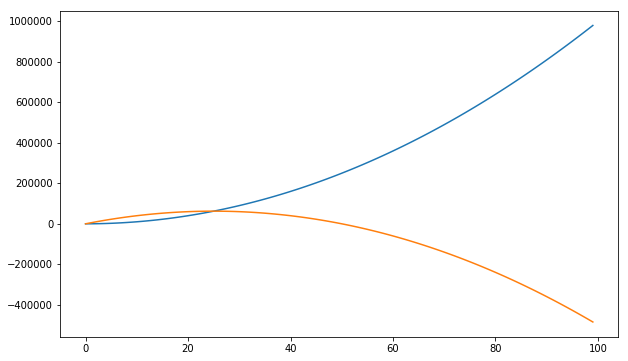

In [199]:
plt.plot(y)
plt.plot(z)
